In [7]:
import os
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms

from dataset import BuildHymenopteraDataLoader
from models import AntBeeClassifier

from tqdm import tqdm

In [56]:
DATA_DIR = './data'

LR = 0.001
NUM_EPOCHS = 10
BATCH_SIZE = 2

VGG16_SIZE = (256, 256)
VGG16_MEAN = (0.485, 0.456, 0.406)
VGG16_STD = (0.229, 0.224, 0.225)

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [57]:
transform_dict = {
    'train': transforms.Compose([transforms.Resize(VGG16_SIZE),
                                 transforms.ToTensor(),
                                 transforms.Normalize(VGG16_MEAN, VGG16_STD)
    ]),
    'val': transforms.Compose([transforms.Resize(VGG16_SIZE),
                                 transforms.ToTensor(),
                                 transforms.Normalize(VGG16_MEAN, VGG16_STD)
    ]),
}

dataloader_builder = BuildHymenopteraDataLoader(data_dir=DATA_DIR, transform_dict=transform_dict, batch_size=BATCH_SIZE)
dataloader_dict = dataloader_builder.get_dataloader()

In [ ]:
model = AntBeeClassifier().to(DEVICE)

params_to_update = []
update_param_names = ["classifier.6.weight", "classifier.6.bias"]

for name, param in model.vgg16.named_parameters():
    if name in update_param_names:
        param.required_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.required_grad = False

optimizer = torch.optim.SGD(params=params_to_update, lr=LR, momentum=0.9)
criterion = nn.BCEWithLogitsLoss()

for epoch in range(0, NUM_EPOCHS+1):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        if epoch == 0 and phase =='train':
            continue

        running_loss = 0
        running_correct = 0

        for image_batch, label_batch in tqdm(dataloader_dict[phase]):
            image_batch = image_batch.to(DEVICE)
            label_batch = label_batch.to(DEVICE)

            optimizer.zero_grad()

            label_pred = model(image_batch)
            
            loss = criterion(label_pred.flatten(), label_batch)
            pred = (label_pred.flatten() > 0).float()

            if phase == 'train':
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * image_batch.size(0)
            running_correct += torch.sum(pred == label_batch)

        running_loss /= len(dataloader_dict[phase].dataset)
        running_acc = running_correct.float() /  len(dataloader_dict[phase].dataset)

        print(f"Epoch: {epoch} | Phase: {phase} | Loss: {loss:.6f} | Acc: {running_acc:.4f}")

classifier.6.weight
classifier.6.bias


100%|██████████| 122/122 [00:01<00:00, 63.60it/s]


Epoch: 1 | Phase: train | Loss: 0.000088 | Acc: 0.9053


100%|██████████| 38/38 [00:00<00:00, 121.65it/s]


Epoch: 1 | Phase: val | Loss: 0.072486 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 64.10it/s]


Epoch: 2 | Phase: train | Loss: 0.001250 | Acc: 0.9588


100%|██████████| 38/38 [00:00<00:00, 122.65it/s]


Epoch: 2 | Phase: val | Loss: 0.031536 | Acc: 0.9868


100%|██████████| 122/122 [00:01<00:00, 63.88it/s]


Epoch: 3 | Phase: train | Loss: 0.005936 | Acc: 0.9712


100%|██████████| 38/38 [00:00<00:00, 122.57it/s]


Epoch: 3 | Phase: val | Loss: 0.000406 | Acc: 0.9737


100%|██████████| 122/122 [00:01<00:00, 63.77it/s]


Epoch: 4 | Phase: train | Loss: 0.005089 | Acc: 0.9794


100%|██████████| 38/38 [00:00<00:00, 122.69it/s]


Epoch: 4 | Phase: val | Loss: 0.002652 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 63.45it/s]


Epoch: 5 | Phase: train | Loss: 0.000000 | Acc: 0.9712


100%|██████████| 38/38 [00:00<00:00, 123.01it/s]


Epoch: 5 | Phase: val | Loss: 0.000059 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 64.28it/s]


Epoch: 6 | Phase: train | Loss: 0.000093 | Acc: 0.9712


100%|██████████| 38/38 [00:00<00:00, 122.50it/s]


Epoch: 6 | Phase: val | Loss: 0.000239 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 64.04it/s]


Epoch: 7 | Phase: train | Loss: 0.177801 | Acc: 0.9835


100%|██████████| 38/38 [00:00<00:00, 122.41it/s]


Epoch: 7 | Phase: val | Loss: 0.000022 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 63.77it/s]


Epoch: 8 | Phase: train | Loss: 0.012289 | Acc: 0.9877


100%|██████████| 38/38 [00:00<00:00, 123.27it/s]


Epoch: 8 | Phase: val | Loss: 0.000031 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 64.27it/s]


Epoch: 9 | Phase: train | Loss: 0.000508 | Acc: 0.9918


100%|██████████| 38/38 [00:00<00:00, 124.94it/s]


Epoch: 9 | Phase: val | Loss: 0.000138 | Acc: 0.9605


100%|██████████| 122/122 [00:01<00:00, 63.93it/s]


Epoch: 10 | Phase: train | Loss: 0.000093 | Acc: 0.9959


100%|██████████| 38/38 [00:00<00:00, 122.94it/s]

Epoch: 10 | Phase: val | Loss: 0.000345 | Acc: 0.9605


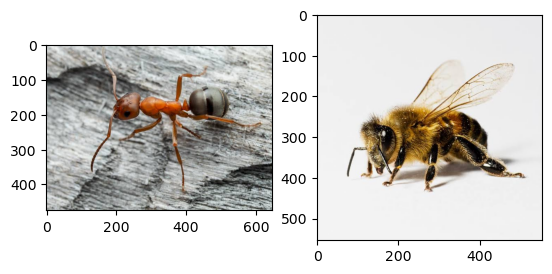

In [64]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

ant_template_path = './ant.jpeg' # desired output: 0
bee_template_path = './bee.jpeg' # desired output: 1

ant_image_template = Image.open(ant_template_path)
bee_image_template = Image.open(bee_template_path)

plt.subplot(1,2,1)
plt.imshow(ant_image_template)

plt.subplot(1,2,2)
plt.imshow(bee_image_template)

tensor([[-29.3530]], device='cuda:0', grad_fn=<AddmmBackward0>) tensor([[15.9267]], device='cuda:0', grad_fn=<AddmmBackward0>)


Text(0.5, 1.0, 'bee')

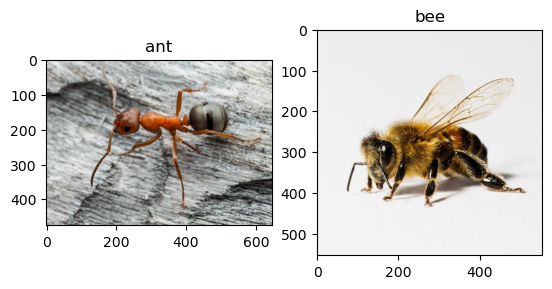

In [79]:
img0 = transform_dict['val'](ant_image_template)
img0 = img0.unsqueeze_(0).to(DEVICE)

img1 = transform_dict['val'](bee_image_template)
img1 = img1.unsqueeze_(0).to(DEVICE)

pred0 = model(img0)
pred1 = model(img1)

print(pred0, pred1)

plt.subplot(1,2,1)
plt.imshow(ant_image_template)
plt.title('ant' if pred0.item() < 0 else 'bee')

plt.subplot(1,2,2)
plt.imshow(bee_image_template)
plt.title('ant' if pred1.item() < 0 else 'bee')

tensor([[0.]], device='cuda:0')